<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/multilayer-perceptrons/Weight_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

In [2]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [3]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [9]:
print(tf.Variable(tf.random.normal(mean=1, shape=(10, 1))))
print()
print(tf.Variable(tf.zeros(shape=(1,))))

<tf.Variable 'Variable:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.97028035],
       [ 1.1755592 ],
       [ 0.98982424],
       [ 0.9511226 ],
       [ 2.1691115 ],
       [ 2.3785062 ],
       [ 0.3574711 ],
       [ 1.3913565 ],
       [ 1.4209106 ],
       [-1.0426815 ]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [6]:
def init_params():
  w = tf.Variable(tf.random.normal(mean=1, shape=(num_inputs, 1)))
  b = tf.Variable(tf.zeros(shape=(1,)))
  return [w, b]

In [10]:
def l2(w):
  return tf.reduce_sum(tf.pow(w, 2)) / 2

In [13]:
def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.003
  animator = d2l.Animator(xlabel='epochs', ylabel = 'loss', yscale = 'log',
                          xlim = [5, num_epochs], legend = ['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      with tf.GradientTape() as tape:
          l = loss(net(X), y) + lambd * l2(w)
      grads = tape.gradient(l, [w, b])
      d2l.sgd([w, b], grads, lr, batch_size)
    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', tf.norm(w).numpy())

L2 norm of w: 19.819578


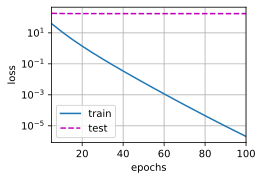

In [14]:
train(lambd=0)

L2 norm of w: 0.4863108


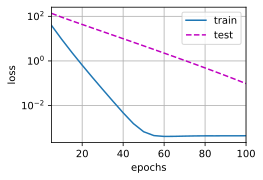

In [15]:
train(lambd=3)

# **Using Tensorflow for L2**

In [18]:
def train_concise(wd):
  net = tf.keras.models.Sequential()
  net.add(
      tf.keras.layers.Dense(
          1, kernel_regularizer = tf.keras.regularizers.l2(wd)))
  net.build(input_shape=(1, num_inputs))
  w, b = net.trainable_variables
  loss = tf.keras.losses.MeanSquaredError()
  num_epochs, lr = 100, 0.003
  trainer = tf.keras.optimizers.SGD(learning_rate=lr)
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                          xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for X, y in train_iter:
      with tf.GradientTape() as tape:
        l = loss(net(X), y) + net.losses
      grads = tape.gradient(l, net.trainable_variables)
      trainer.apply_gradients(zip(grads, net.trainable_variables))
    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  print('L2 norm of w:', tf.norm(net.get_weights()[0]).numpy())

L2 norm of w: 1.2730678


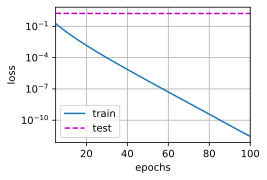

In [19]:
train_concise(0)


L2 norm of w: 0.03232968


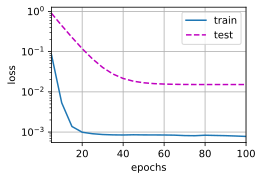

In [20]:
train_concise(3)

# **Exercise**